In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import numpy as np


In [2]:
data=pd.read_csv('HDFC1619.csv')
#data.head()

In [3]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Date'])
df['y'] = data['Close Price']
df.sort_values(by=['ds'], inplace=True, ascending=True)
df.reset_index(drop=True,inplace=True)
#df.head()

In [4]:
train=df.iloc[:-10]
test=df.iloc[-10:]

In [5]:
m=Prophet(
        growth="linear",
        seasonality_mode="multiplicative",
        changepoint_prior_scale=30,
        seasonality_prior_scale=35)

In [6]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=10, freq='D')

In [8]:

forecast = m.predict(future)

In [9]:
pred=forecast[['ds','yhat']]

In [10]:
pred=df.merge(pred, how='inner', on='ds')

In [11]:
pred.set_index('ds',inplace=True)

<AxesSubplot:xlabel='ds'>

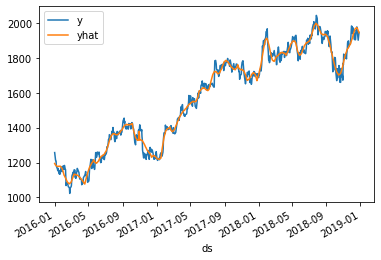

In [12]:
pred.plot()

In [16]:
def MAPE(pred,actual):
    return np.mean(np.abs((pred-actual)/actual))*100

In [19]:
print(f'The error is {round(MAPE(pred.yhat,pred.y), 2)}%')

The error is 1.5%
